In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest<br>
Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible.<br>

Our aim of the project is to analyse more recent movie ratings data and determine whether there has been any change in the system and have they improved upon their system or not since. 


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df_score = pd.read_csv('fandango_score_comparison.csv')
df_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [5]:
df_score.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [7]:
df_ratings.head(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


For our analysis, Fandango ratings are what we are interested in, thus we will isolate those columns so we can focus on them better.<br>
For the dataset, fandango_score_comparison.csv, the columns we are interested in are :-<br>

    1.FILM - movie
    2.Fandango_Stars - Number of stars the movie has on Fandango page
    3.Fandango_Ratingvalue - The actual average score the movie obtained
    4.Fandango_votes - Number of user votes the film had on Fandango page
    5.Fandango_Difference - The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue
    
From the other dataset, movie_ratings_16_17, containing movie ratings of films from 2016 - 2017, the columns we are interested in are :- 

    1. movie - the film
    2. year - year it was released in
    3. fandango - fandango rating of the movie

In [43]:
fandango_before = df_score[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_after = df_ratings[['movie', 'year', 'fandango']]

For our analysis whether Fandango ratings have changed before and after Hickey's analysis, the population in consideration is the set of all movies rated on Fandango's website. The samples we have taken are of two time periods, One in 2014 - 2015 and the other in 2016 - 2017, and fall under Fandango's rating previous to Hickey's analysis and Fandango's rating after the analysis respectively. <br><br>
The question is whether these samples are representatives of the population. Due to the different time periods, the movies differ and in some years movies can be better than the other. Secondly, the criteria that movies with atleast 30 fan reviews for our sample before Hickey's analysis shows that it wasn't purely random and every movie did not have an equal chance to be included. For our sample after Hickey's analysis has the criteria that movies chosen have a significant number of votes which again means that sampling was not random.<br>
The links to both the datasets and `README.md` can be found at - <br><br>
<a href=https://github.com/fivethirtyeight/data/blob/master/fandango/README.md>Link 1</a><br>
<a href=https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md>Link 2</a>

Since our samples are not representatives, we might have to collect new data or change/tweak the goal to better suit the samples.<br>
It wouold be easier to change the goal. Thus our new goal is to compare Fandango's ratings for popular movies in 2015 and 2016 and analyse if there is any difference.

The definition of popular movies is vague, hence we have to come up with our own definition for it. Let us use a known measure i.e. Movies with 30 fan ratings on Fandango's website. <br>
The sample `fandango_score_15` is already alligned with this criteria. But the sample `fandango_score_16` has no column for the same, hence we have to find a proxy.<br>

Lets us randomly sample 10 points from the `fandango_score_16`

In [23]:
fandango_after.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Upon manually checking on the Website, we find that about 90% of the movies from the random sample have Fan ratings > 30. Thus this is a good enough representative for a population of popular movies.

Since we have changed the goal to analyzing popular movies in 2015 and 2016, our population for the analysis are all movies released in 2015 and 2016. Let us isolate these

In [44]:
fandango_15 = fandango_before[fandango_before['FILM'].str.contains('2015')]
fandango_15.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [45]:
fandango_16 = fandango_after[fandango_after.year == 2016]
fandango_16.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


These two samples are what we will use for our analysis here on.

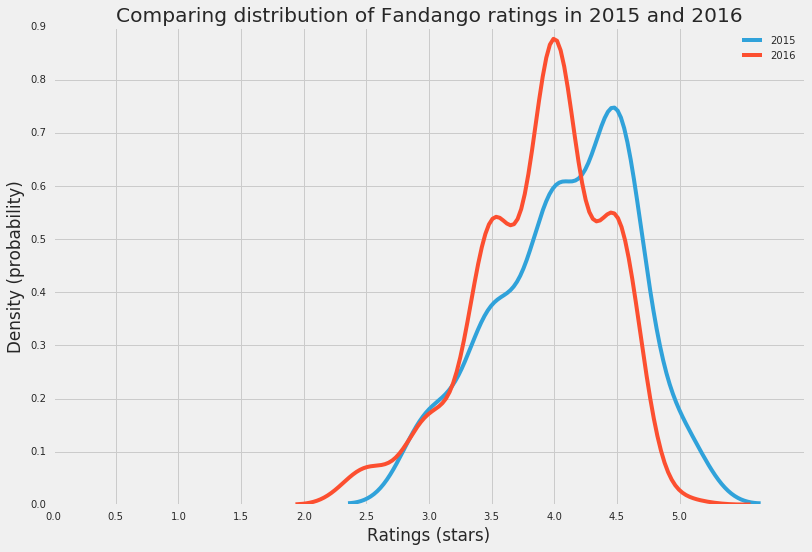

In [6]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.kdeplot(fandango_15.Fandango_Stars,label='2015')
sns.kdeplot(fandango_16.fandango,label='2016')
plt.title("Comparing distribution of Fandango ratings in 2015 and 2016")
plt.ylabel('Density (probability)')
plt.xlabel('Ratings (stars)')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend()

Analyzing the graph, both the `kernel density plots` look close to a Gaussian curve and left skewed. The 2015 density plot is slightly more left skewed than the 2016 density plot.  <br>
The left skew suggests that the movies are generally given a high rating. The left shift in 2016 suggests that there is a difference in the ratings of 2015 and 2016, and we can also see the direction, the 2016 movie ratings were slightly lesser than 2015.

The plot above shows that there is a clear difference between the densities of 2015 and 2016, however if we analyse further on a granular level, we see that the two samples have unequal number of movies.

In [7]:
fandango_15.Fandango_Stars.value_counts(dropna=False).sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [8]:
fandango_16.fandango.value_counts(dropna=False).sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

We can see that the 2016 sample has more number of movies and proportion of distribution for the same value of Rating is also higher.<br> 
Thus comparing them straightaway doesnt not make sense.<br><br>

To work our way around this, we could use the proportions/percentages (relative frequecies) to compare the two.

In [15]:
fandango_15.Fandango_Stars.value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [14]:
fandango_16.fandango.value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We can see that, mvoies in 2016 have lesser percenatages of higher ratings (4.5 or 5 stars). In 2016, only close to 0.5% of the movies were rated 5 stars. Whereas, 2016 saw a spike in 3.5 and 4 stars rating  percentages as compared to 2015. In the 2016 sample, a new low of 2.5 stars was recorded as well.<br>

The 3.5 and 4 are still very high ratings, thus direction of difference between the two samples is what we have to define better. To understand this better let us analyse the summay statistics for both the samples.

In [64]:
summary_stats = pd.DataFrame({
        '2015':[
            fandango_15.Fandango_Stars.mean(),
            fandango_15.Fandango_Stars.mode()[0],
            fandango_15.Fandango_Stars.median()
        ],
        '2016':[
            fandango_16.fandango.mean(),
            fandango_16.fandango.mode()[0],
            fandango_16.fandango.median()
        ]             
    }
)

summary_stats.index = [
    'mean',
    'mode',
    'median'
]

summary_stats

,2015,2016
mean,4.085271,3.887435
mode,4.500000,4.000000
median,4.000000,4.000000


In [121]:
summary_stats['2016'] - summary_stats['2015']

mean     -0.197837
mode     -0.500000
median    0.000000
dtype: float64

As we can see, there is difference between the samples. The 2016 sample has slighly lesser mean than 2015 sample, this is confirmed by the mode, 2016 has most common rating as 4 star whereas 2015 sample has a slightly higher common rating of 4.5 star.<br>

We are sure of the direction of difference between the two distributions. 2016 sample is slightly lesser than the 2015 sample.

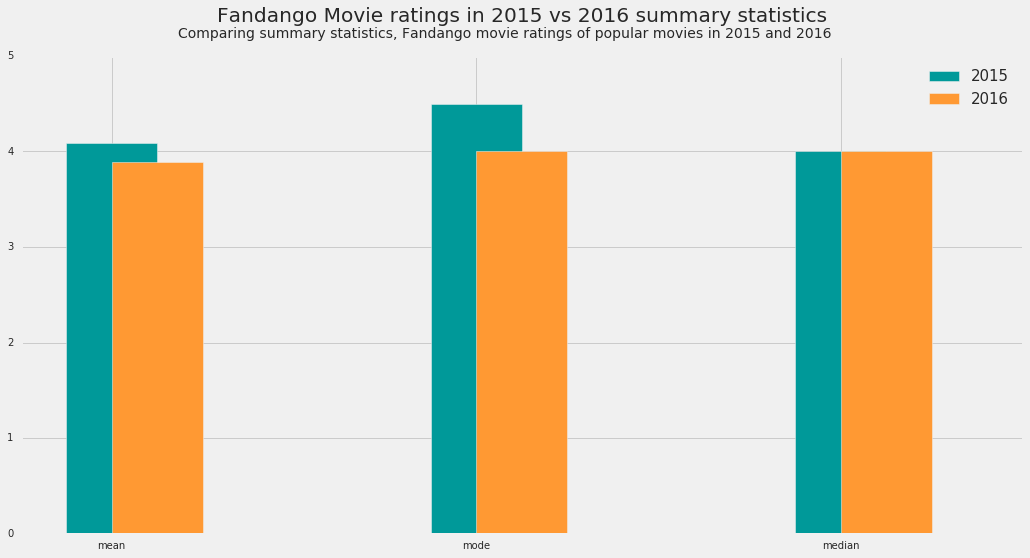

In [119]:
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
summary_stats['2015'].plot.bar(color='#009999',align='center',width=0.25,label='2015')
summary_stats['2016'].plot.bar(color='#ff9933',align='edge',width=0.25, label='2016',rot=0)
plt.legend(loc='upper right',fontsize=15)
plt.ylim(0,5)
plt.title('Fandango Movie ratings in 2015 vs 2016 summary statistics',y=1.06)
plt.suptitle('Comparing summary statistics, Fandango movie ratings of popular movies in 2015 and 2016',y=0.95)

The plot shows clearly what we had concluded from the summary statistics table above. We can see that the 2016 sample clearly has a difference and the ratings are slighly lesser than 2015 sample.

In conclusion, The Fandango ratings for popular movies in 2015 differs from the Fandango ratings for popular movies in 2016. The ratings in 2016 dipped a bit as compared to the 2015 movie ratings. Thus on average popular movies were rated lesser as compared to in 2015.